介绍了如何利用pytorch建立一个基本的分类神经网络

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [39]:
# 建立数据
n_data = torch.ones(100, 2)
x0 = torch.normal(2 * n_data, 1)
y0 = torch.zeros(100)
x1 = torch.normal(-2 * n_data, 1)
y1 = torch.ones(100)
x = torch.cat((x0, x1), dim=0).type(torch.FloatTensor)
y = torch.cat((y0, y1), ).type(torch.LongTensor)

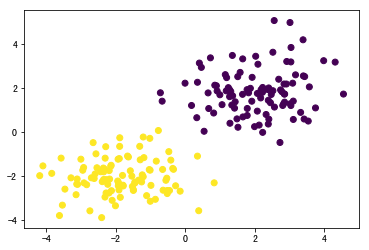

In [41]:
# 画图
plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c=y.data.numpy())
plt.show()

In [15]:
# 建立网络
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_features, n_hidden)
        self.output = torch.nn.Linear(n_hidden, n_output)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.output(x)   # 返回两个概率值，以求解交叉熵
        return x

In [16]:
net = Net(n_features=2, n_hidden=10, n_output=2)
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=2, bias=True)
)


In [35]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_fun = torch.nn.CrossEntropyLoss()

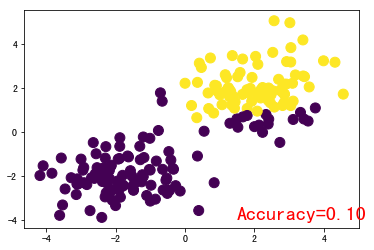

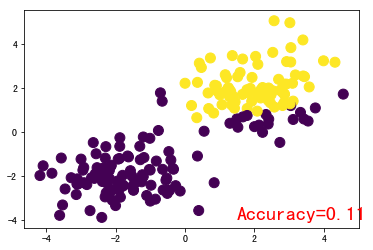

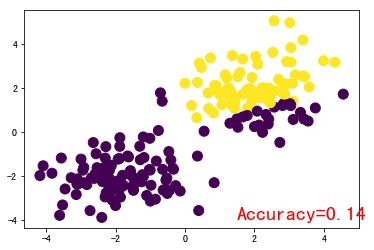

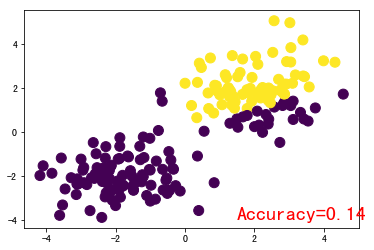

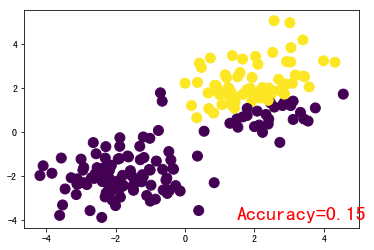

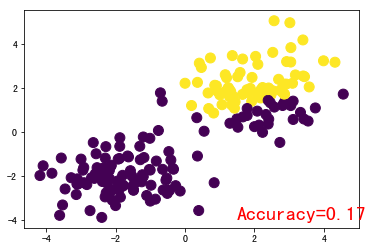

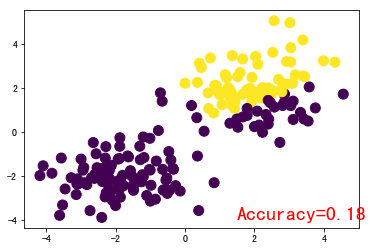

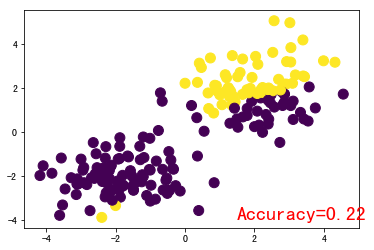

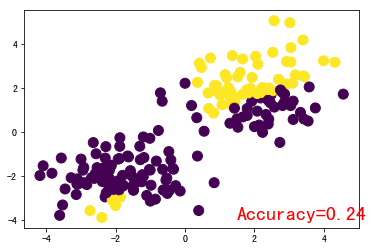

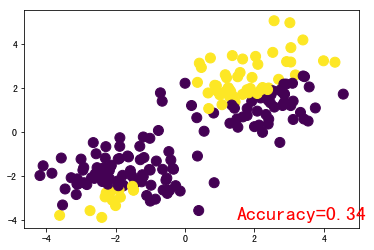

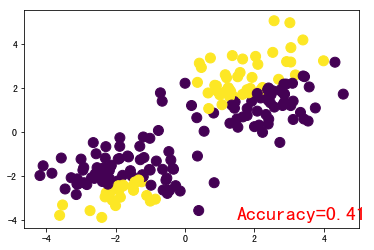

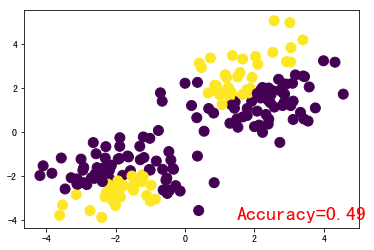

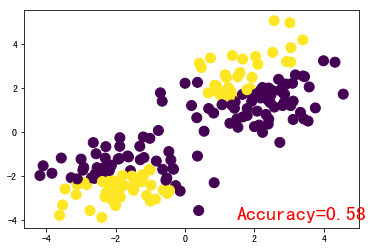

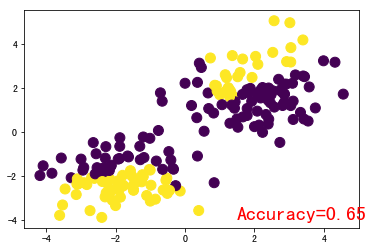

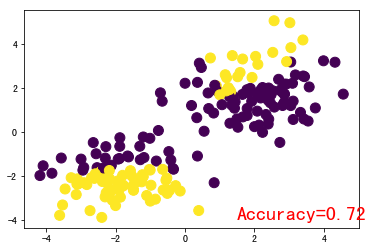

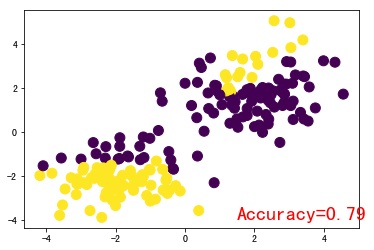

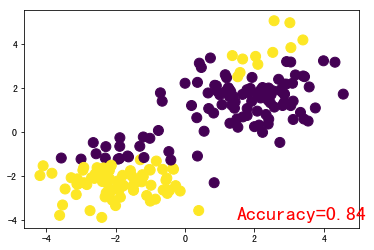

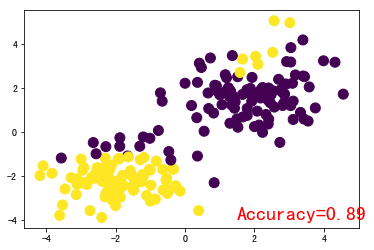

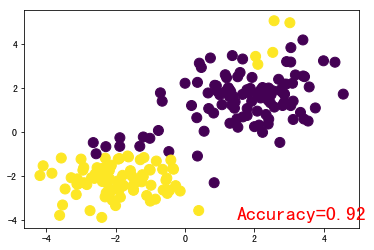

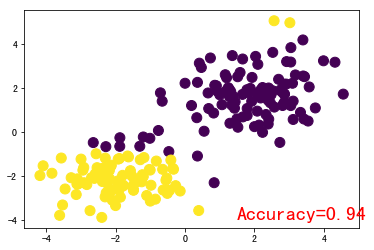

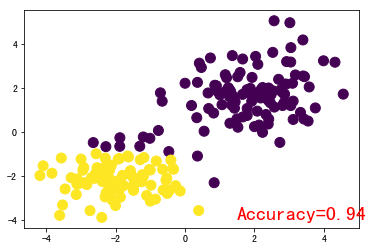

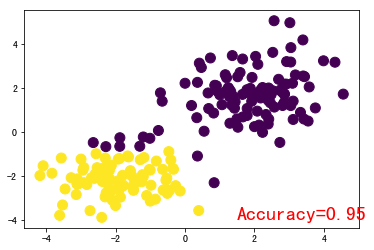

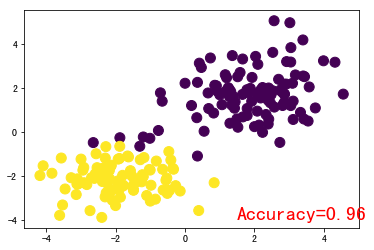

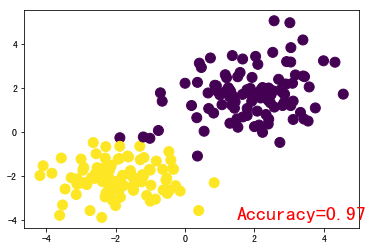

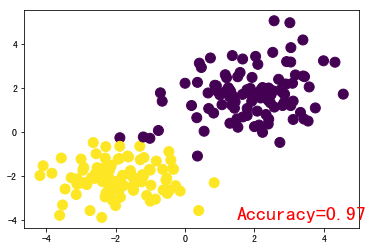

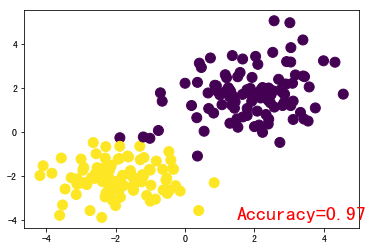

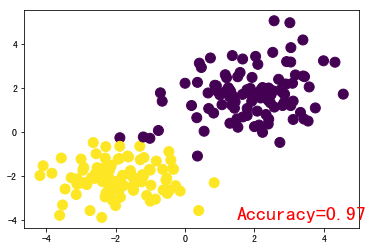

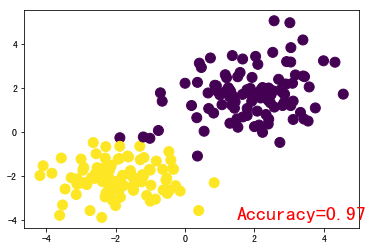

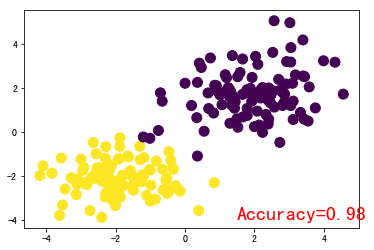

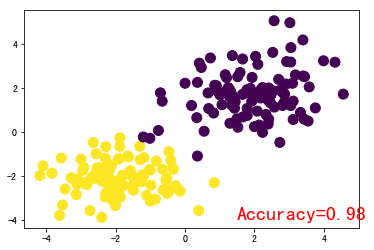

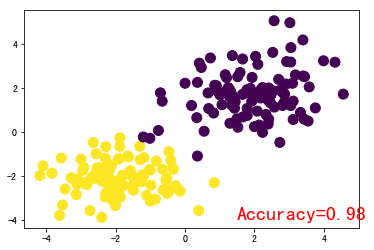

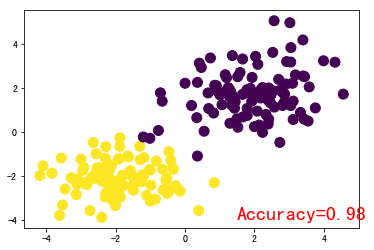

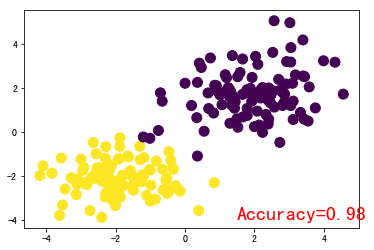

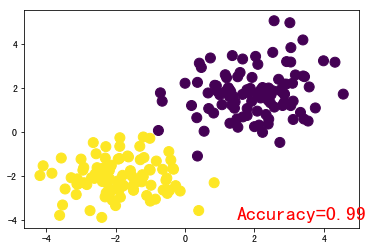

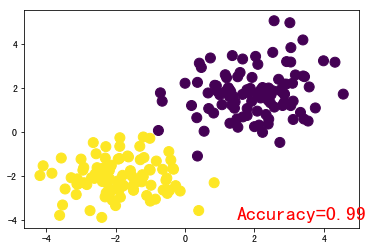

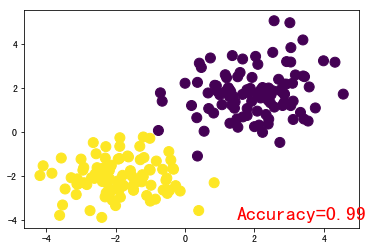

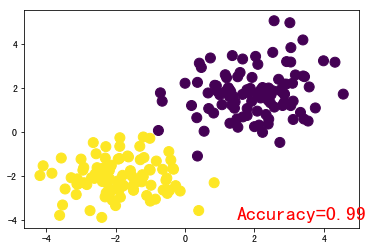

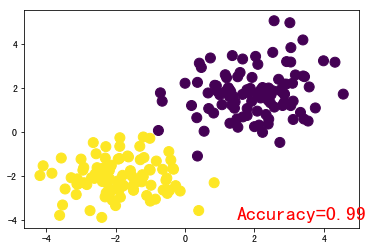

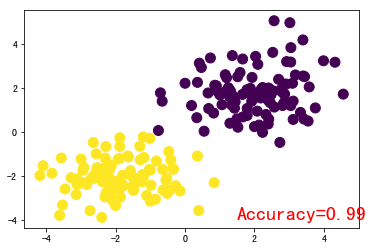

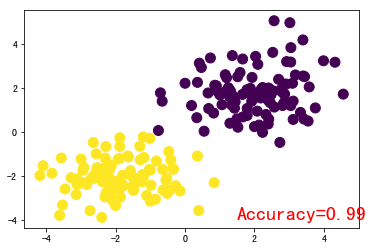

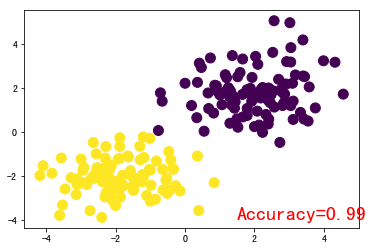

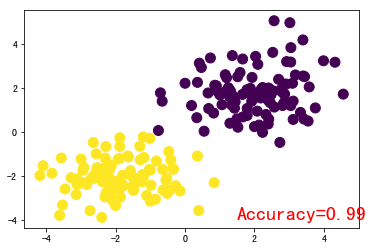

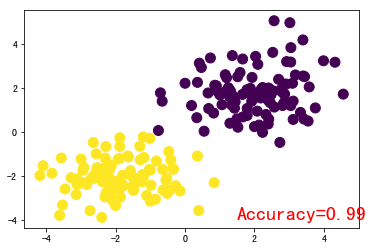

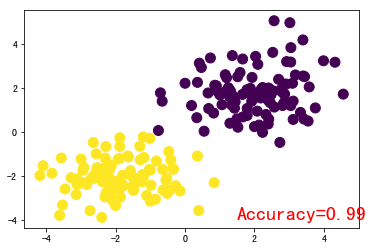

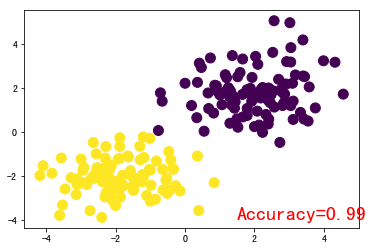

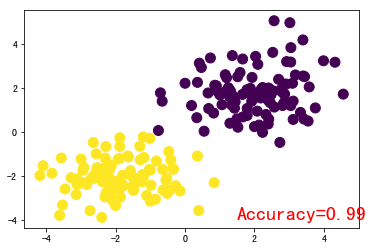

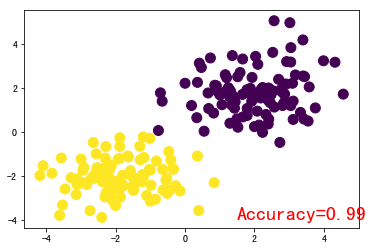

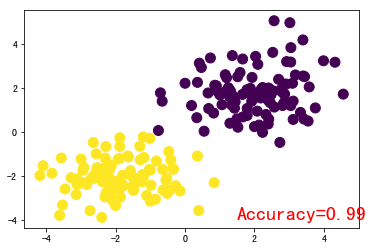

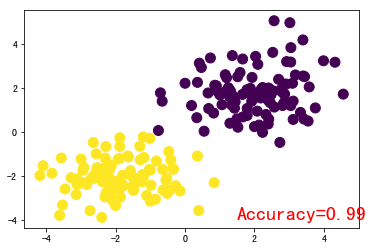

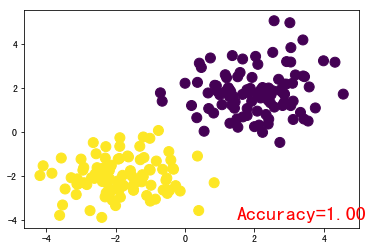

In [42]:
# 训练模型
plt.ion
for t in range(100):
    prediction = net(x)
    loss = loss_fun(prediction, y)   # y不应该为one-hot结果
    
    optimizer.zero_grad()   # 清楚梯度
    loss.backward()
    optimizer.step()
    
    if t % 2 == 0:
        plt.cla()
        y_pred_tensor =torch.max(prediction,1)[1]    # 对应的索引，再分类中即为预测的标签值
        y_pred = y_pred_tensor.data.numpy()
        y_target = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c=y_pred, s=100)
        accuracy = float((y_pred==y_target).astype(int).sum()/len(y_target))
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()